In [2]:
#import authentication modules

import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

In [3]:
# authenticate user

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [4]:
# import required libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
tf.__version__

'2.15.0'

In [7]:
# reading the dataset and convert into dataframe

worksheet = gc.open('datasetforex1').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])

In [8]:
#showing first five samples

df.head()



,input,output
0,1,3
1,2,5
2,3,7
3,4,9
4,5,11


In [9]:
df[['input', 'output']] = df[['input', 'output']].astype(float)
df.head()

,input,output
0,1.0,3.0
1,2.0,5.0
2,3.0,7.0
3,4.0,9.0
4,5.0,11.0


In [10]:
X=df[['input']].values
y=df[['output']].values

In [11]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [12]:
y

array([[ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.],
       [23.],
       [25.],
       [27.],
       [29.],
       [31.],
       [33.],
       [35.],
       [37.],
       [39.],
       [41.]])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)


In [14]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled

array([[0.11764706],
       [1.        ],
       [0.58823529],
       [0.70588235],
       [0.29411765],
       [0.35294118],
       [0.23529412],
       [0.82352941],
       [0.05882353],
       [0.76470588],
       [0.64705882],
       [0.        ],
       [0.94117647]])

In [18]:
ai_brain = Sequential([
    Dense(units = 1, activation = 'relu', input_shape=[1]),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 1)
])

In [19]:
ai_brain.compile(optimizer='rmsprop',loss='mse')


In [20]:
ai_brain.fit(x=x_train_scaled,y=y_train,epochs=4000)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 29.1628
Epoch 1502/4000
1/1 [==============================] - 0s 13ms/step - loss: 29.1050
Epoch 1503/4000
1/1 [==============================] - 0s 17ms/step - loss: 29.0476
Epoch 1504/4000
1/1 [==============================] - 0s 7ms/step - loss: 28.9904
Epoch 1505/4000
1/1 [==============================] - 0s 11ms/step - loss: 28.9336
Epoch 1506/4000
1/1 [==============================] - 0s 15ms/step - loss: 28.8770
Epoch 1507/4000
1/1 [==============================] - 0s 7ms/step - loss: 28.8207
Epoch 1508/4000
1/1 [==============================] - 0s 11ms/step - loss: 28.7648
Epoch 1509/4000
1/1 [==============================] - 0s 7ms/step - loss: 28.7091
Epoch 1510/4000
1/1 [==============================] - 0s 7ms/step - loss: 28.6537
Epoch 1511/4000
1/1 [==============================] - 0s 7ms/step - loss: 28.5987
Epoch 1512/4000
1/1 [==========================

In [21]:
ai_brain.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 5)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

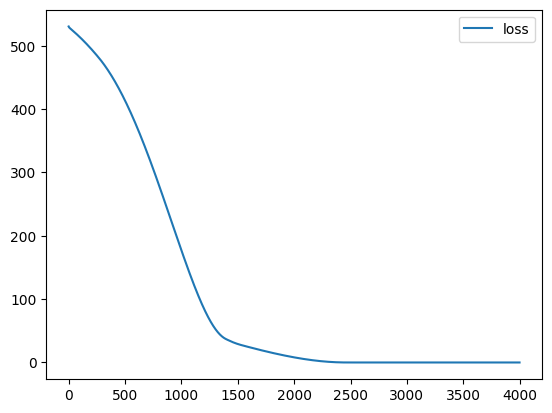

In [23]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()


In [26]:
x_test1 = scaler.transform(x_test)


In [27]:
ai_brain.evaluate(x_test1,y_test)


1/1 [==============================] - 0s 141ms/step - loss: 5.4841e-04


0.0005484123830683529

In [ ]:
ai_brain.evaluate(x_test,y_test)


1/1 [==============================] - 0s 111ms/step - loss: 591.5504


591.5504150390625

In [28]:
X_n1 = [[30]]
X_n1_1 = scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 169ms/step


array([[61.044834]], dtype=float32)